<a href="https://colab.research.google.com/github/kunalNbadgujar/Sign-Language-Recognization/blob/main/Sign_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
IMAGE_SIZE = 150

BATCH_SIZE = 20
CHANNELS = 3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "A:\SignLanguage\LOW\SignLanguage low",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 9925 files belonging to 25 classes.


In [ ]:
Class_names = dataset.class_names
Class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [ ]:
len(dataset)

497

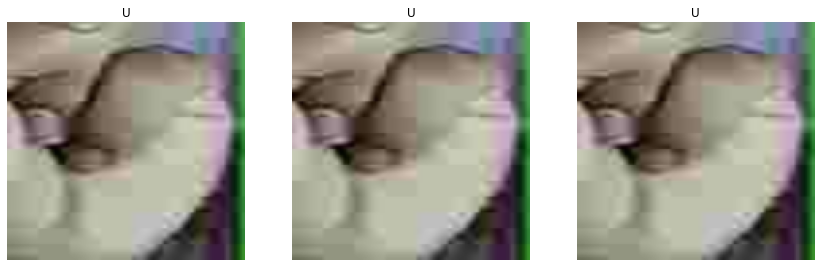

In [ ]:
 plt.figure(figsize=(40,40))
 for image_batch, label_batch in dataset.take(1):
   for i in range(3):
     ax = plt.subplot(6,8,i+1)
     plt.imshow(image_batch[0].numpy().astype("uint8"))
     plt.title(Class_names[label_batch[0]])
     plt.axis("off")

In [ ]:
def get_dataset_partition_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 1000) :
    
  ds_size = len(ds)
    
  if shuffle:
    ds = ds.shuffle(shuffle_size,seed = 12)
        

  train_size  = int(train_split * ds_size)
  val_size    = int(val_split * ds_size)

  train_ds    = ds.take(train_size)
  val_ds      = ds.skip(train_size).take(val_size)
  test_ds     = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds =  get_dataset_partition_tf(dataset)

In [ ]:
print('train_size=',len(train_ds),'\ntest_size =',len(test_ds),'\nval size =',len(val_ds))

train_size= 397 
test_size = 51 
val size = 49


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:

resize_and_rescale = tf.keras.Sequential ([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
SHAPE= (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 25
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=SHAPE),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3) ,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3) ,activation='relu'),
    layers.MaxPooling2D((2,2)),
    # layers.Conv2D(64, (3, 3) ,activation='relu'),
    # layers.MaxPooling2D((2,2)),
    # layers.Conv2D(64, (3, 3) ,activation='relu'),
    # layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation='softmax'),
  ])

model.build(input_shape = SHAPE)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (20, 150, 150, 3)         0         
_________________________________________________________________
sequential_4 (Sequential)    (20, 150, 150, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (20, 148, 148, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (20, 74, 74, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (20, 72, 72, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (20, 36, 36, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (20, 34, 34, 64)         

In [ ]:
from tensorflow.keras import optimizers
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
                    train_ds,
                    epochs=5,
                    steps_per_epoch=50,
                    batch_size = BATCH_SIZE,
                    validation_data = val_ds,
                  )

Epoch 1/5
50/50 [==============================] - 62s 835ms/step - loss: 3.2250 - accuracy: 0.0360 - val_loss: 3.2164 - val_accuracy: 0.0398
Epoch 2/5
50/50 [==============================] - 22s 444ms/step - loss: 3.2194 - accuracy: 0.0410 - val_loss: 3.2107 - val_accuracy: 0.0408
Epoch 3/5
50/50 [==============================] - 23s 465ms/step - loss: 3.1943 - accuracy: 0.0650 - val_loss: 3.2068 - val_accuracy: 0.0663
Epoch 4/5
50/50 [==============================] - 23s 455ms/step - loss: 3.1866 - accuracy: 0.0700 - val_loss: 3.1183 - val_accuracy: 0.1082
Epoch 5/5
50/50 [==============================] - 22s 435ms/step - loss: 3.1362 - accuracy: 0.0975 - val_loss: 3.0376 - val_accuracy: 0.1153


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


Text(0.5, 1.0, 'training and validation accuracy')

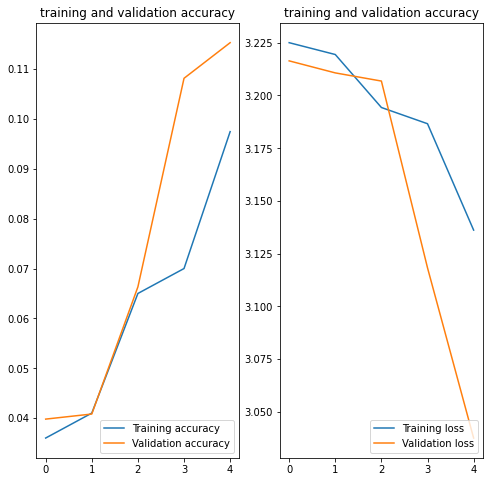

In [ ]:

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(5), acc , label = "Training accuracy")
plt.plot(range(5), val_acc , label = "Validation accuracy")
plt.legend(loc='lower right')
plt.title("training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(5), loss , label = "Training loss")
plt.plot(range(5), val_loss , label = "Validation loss")
plt.legend(loc='lower right')
plt.title("training and validation accuracy")



In [ ]:
model.evaluate(test_ds,steps=5)

5/5 [==============================] - 26s 63ms/step - loss: 3.1048 - accuracy: 0.1000


[3.1048424243927, 0.10000000149011612]